<a href="https://colab.research.google.com/github/beatrizmayorka/FabProd/blob/Master/FabProd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A FabProd é uma empresa que produz produtos de limpeza automotiva e enfrenta desafios em relação à competitividade e à lucratividade. Diante desse cenário, é importante realizar uma análise exploratória dos dados dos produtos fabricados pela empresa, a fim de identificar oportunidades e possíveis problemas que possam estar afetando a performance da empresa. Neste sentido, apresenta-se uma tabela com informações relevantes sobre os produtos fabricados pela FabProd, a fim de realizar essa análise exploratória e obter insights que possam ajudar a empresa a se destacar no mercado de limpeza automotiva.

**Imports e Preparação de Bibliotecas**

In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

**Geração de Dados Sintéticos**

In [22]:
# Definir os produtos, preços e regiões
products = ['Desodorizante automotivo', 'Limpa-vidros interno', 'Desengraxante', 'Cera de carro', 'Hidratante de couro']
prices = [25.90, 39.90, 47.80, 68.90, 76.90]
regions = ['Norte', 'Nordeste', 'Centro-Oeste', 'Sudeste', 'Sul']

# Criar um DataFrame vazio
sales_data = pd.DataFrame(columns=['Region', 'Product', 'Price', 'MonthlySales'])

# Definir o número de meses para os quais queremos gerar dados sintéticos
num_months = 12

# Preencher o DataFrame com dados sintéticos
for month in range(1, num_months + 1):
    for region in regions:
        for product, price in zip(products, prices):
            monthly_sales = np.random.randint(50, 200)  # Gerar vendas mensais aleatórias entre 50 e 200
            data = {'Region': region, 'Product': product, 'Price': price, 'MonthlySales': monthly_sales}
            sales_data = sales_data.append(data, ignore_index=True)

<ipython-input-22-29fa25ed3c6f>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales_data = sales_data.append(data, ignore_index=True)
<ipython-input-22-29fa25ed3c6f>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales_data = sales_data.append(data, ignore_index=True)
<ipython-input-22-29fa25ed3c6f>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales_data = sales_data.append(data, ignore_index=True)
<ipython-input-22-29fa25ed3c6f>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales_data = sales_data.append(data, ignore_index=True)
<ipython-input-22-29fa25ed3c6f>:18: FutureWarning: The frame.append method is deprecated and

**Visualização dos Dados Sintéticos**

In [23]:
sales_data.head()

,Region,Product,Price,MonthlySales
0,Norte,Desodorizante automotivo,25.9,143
1,Norte,Limpa-vidros interno,39.9,111
2,Norte,Desengraxante,47.8,190
3,Norte,Cera de carro,68.9,91
4,Norte,Hidratante de couro,76.9,126


In [24]:
# Agrupar os dados por região
grouped_by_region = sales_data.groupby('Region')

# Exibir os dados de cada grupo (região)
for region, group in grouped_by_region:
    print(f"Região: {region}")
    print(group)
    print("\n")

Região: Centro-Oeste
           Region                   Product  Price MonthlySales
10   Centro-Oeste  Desodorizante automotivo   25.9           99
11   Centro-Oeste      Limpa-vidros interno   39.9           96
12   Centro-Oeste             Desengraxante   47.8          178
13   Centro-Oeste             Cera de carro   68.9           66
14   Centro-Oeste       Hidratante de couro   76.9           94
35   Centro-Oeste  Desodorizante automotivo   25.9           60
36   Centro-Oeste      Limpa-vidros interno   39.9          171
37   Centro-Oeste             Desengraxante   47.8          118
38   Centro-Oeste             Cera de carro   68.9          175
39   Centro-Oeste       Hidratante de couro   76.9          134
60   Centro-Oeste  Desodorizante automotivo   25.9          152
61   Centro-Oeste      Limpa-vidros interno   39.9           84
62   Centro-Oeste             Desengraxante   47.8          161
63   Centro-Oeste             Cera de carro   68.9          139
64   Centro-Oeste  

In [25]:
total_sales_by_product = sales_data.groupby('Product')['MonthlySales'].sum()
print('Total de vendas por produto: ')
print(total_sales_by_product)

Total de vendas por produto: 
Product
Cera de carro               6800
Desengraxante               7361
Desodorizante automotivo    7857
Hidratante de couro         7831
Limpa-vidros interno        7752
Name: MonthlySales, dtype: object


In [26]:
total_sales = sales_data['MonthlySales'].sum()
print('Total de vendas: ', total_sales)

Total de vendas:  37601


**Análise Descritiva**

Estatísticas descritivas:
            Price
count  300.000000
mean    51.880000
std     18.743871
min     25.900000
25%     39.900000
50%     47.800000
75%     68.900000
max     76.900000


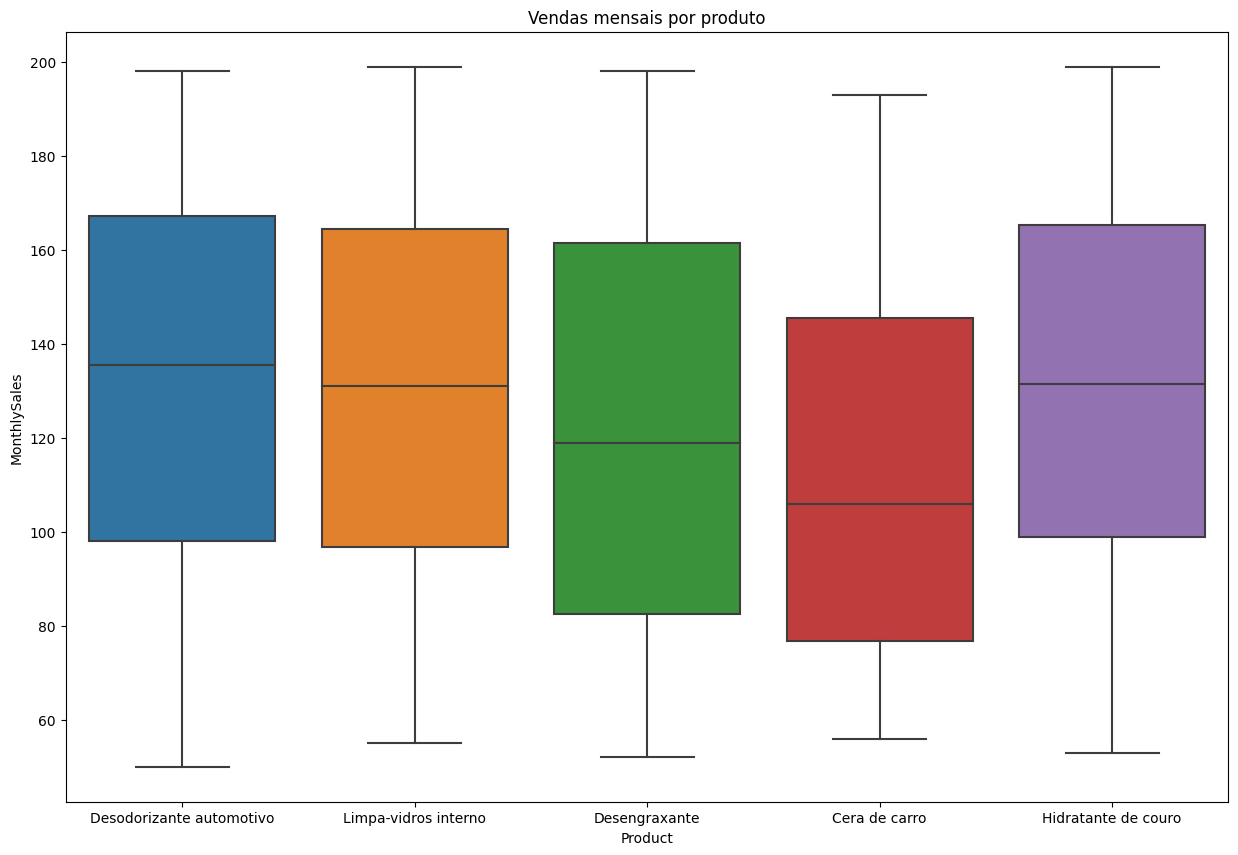

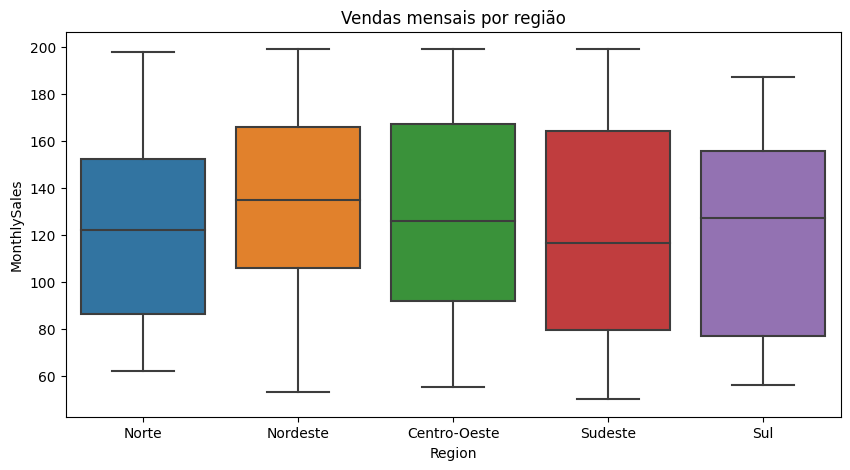

<ipython-input-27-fa005419882c>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='MonthlySales', hue='Product', data=sales_data, ci=None)


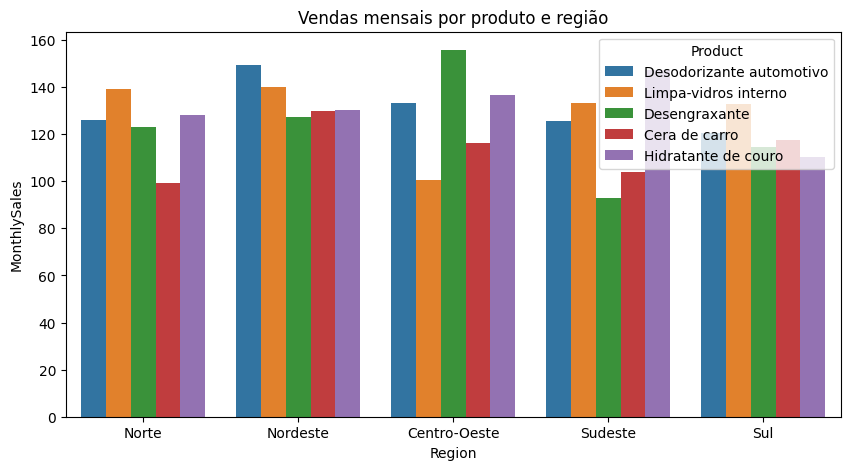

In [27]:
# Estatísticas descritivas
print("Estatísticas descritivas:")
print(sales_data.describe())

# Gráfico de vendas mensais por produto
plt.figure(figsize=(15, 10))
sns.boxplot(x='Product', y='MonthlySales', data=sales_data)
plt.title('Vendas mensais por produto')
plt.show()

# Gráfico de vendas mensais por região
plt.figure(figsize=(10, 5))
sns.boxplot(x='Region', y='MonthlySales', data=sales_data)
plt.title('Vendas mensais por região')
plt.show()

# Gráfico de vendas mensais por produto e região
plt.figure(figsize=(10, 5))
sns.barplot(x='Region', y='MonthlySales', hue='Product', data=sales_data, ci=None)
plt.title('Vendas mensais por produto e região')
plt.show()

A análise descritiva do problema começa trazendo as estatísticas descritivas. Essas estatísticas fornecem uma visão geral das características centrais e da dispersão das vendas mensais. O tratamento dessas estatísticas inclui o número de observações, média, desvio padrão, valor mínimo, quartis e valor máximo.

O primeiro gráfico compara vendas mensais por produto. Cada caixa representa a variação das vendas para um determinado produto, mostrando a mediana, quartis, valores mínimos e máximos. Esse gráfico ajuda a comparar as vendas entre os diferentes produtos e identificar possíveis discrepâncias ou padrões.

Para o segundo gráfico tem-se a análise de vendas mensais por região, permitindo comparar as vendas entre as diferentes regiões e identificar possíveis diferenças ou padrões regionais nas vendas.

No terceiro gráfico realiza-se o modo de barplot. As barras representam as vendas médias para cada combinação de produto e região, com as cores representando diferentes produtos. A análise dele permite identificar quais produtos são mais populares em cada região ou se há diferenças significativas nas vendas entre os produtos.

**Análise Sazonal**

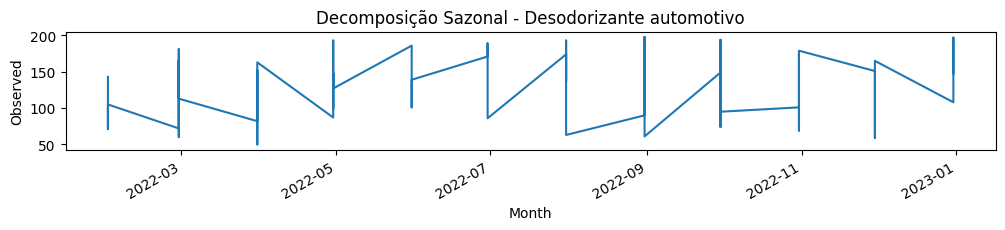

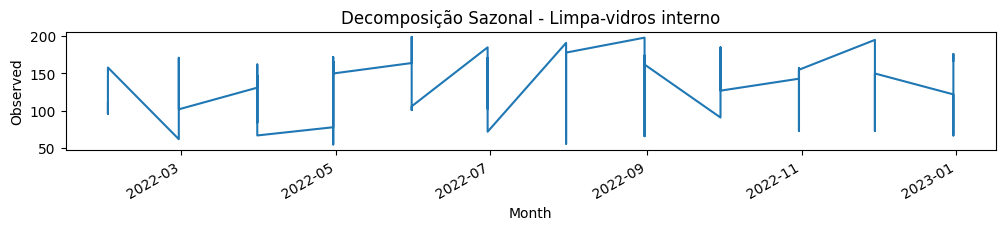

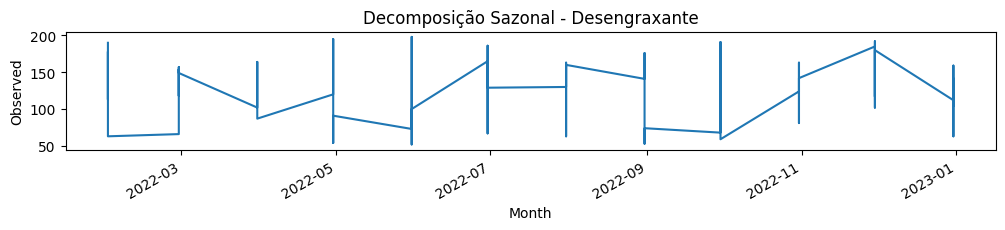

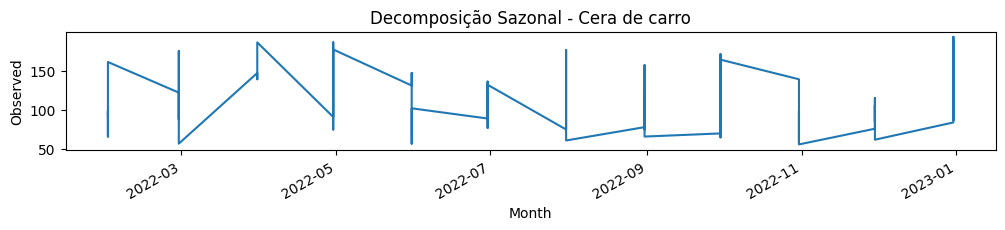

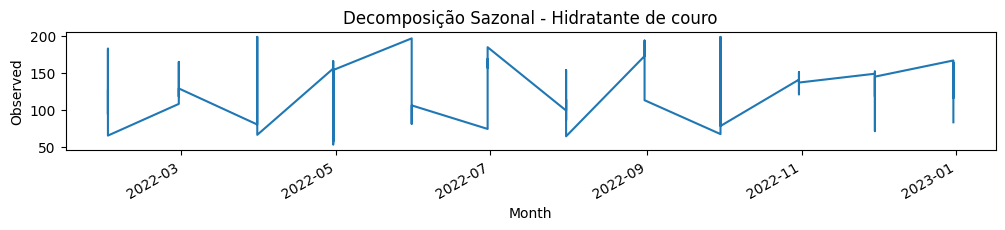

In [28]:
# Converter a coluna "MonthlySales" para o formato de data
sales_data['Month'] = pd.date_range(start='2022-01', periods=num_months, freq='M').repeat(len(regions) * len(products))
sales_data.set_index('Month', inplace=True)

# Separar os dados de cada produto em um DataFrame separado
product_sales_data = {}
for product in products:
    product_sales_data[product] = sales_data[sales_data['Product'] == product].drop(['Product', 'Price'], axis=1)

# Realizar a decomposição sazonal para cada produto
for product in products:
    sales = product_sales_data[product]['MonthlySales']
    decomposition = seasonal_decompose(sales, model='additive', period=12)
    
    # Plotar a decomposição sazonal
    plt.figure(figsize=(12,8))
    plt.subplot(411)
    plt.title('Decomposição Sazonal - ' + product)
    decomposition.observed.plot(ax=plt.gca())
    plt.ylabel('Observed')

A análise sazonal realizada ajuda a identificar padrões recorrentes nas vendas ao longo do tempo. Por meio da decomposição sazonal, os dados são separados em diferentes componentes, possibilitando uma melhor compreensão das tendências de longo prazo. Essa análise pode ser útil para identificar momentos de alta demanda em períodos específicos do ano, identificar padrões sazonais distintos para cada produto e obter outras informações relevantes para a análise da FabProd.

**Análise de Tendências**

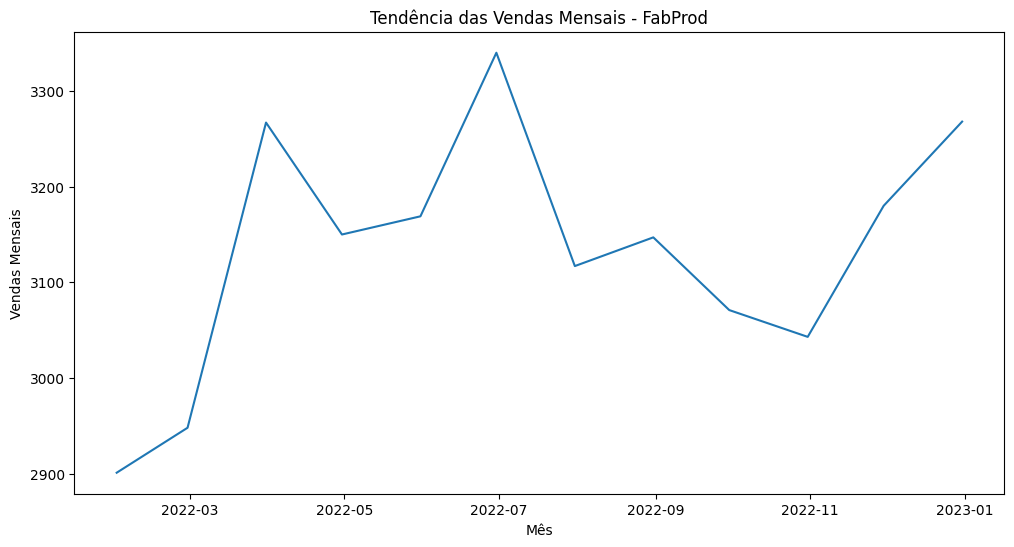

In [29]:
# Agregando vendas mensais totais
monthly_sales = sales_data.groupby('Month')['MonthlySales'].sum()

# Plotando a tendência das vendas mensais
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales)
plt.title('Tendência das Vendas Mensais - FabProd')
plt.xlabel('Mês')
plt.ylabel('Vendas Mensais')
plt.show()


A análise de tendências revelou um aumento nas vendas ao longo dos últimos meses, indicando um padrão positivo de crescimento para a FabProd. Essa tendência ascendente sugere um aumento na demanda pelos produtos de limpeza de veículos, o que é um indicativo positivo para a empresa.

Essa análise é importante para que a FabProd possa identificar e aproveitar o momento positivo das vendas. Compreender a tendência de crescimento permite à empresa ajustar sua estratégia de produção, marketing e distribuição para atender à demanda crescente e otimizar sua posição no mercado.

**Análise de Correlação**

<ipython-input-30-181f04370308>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = sales_data_encoded.corr()


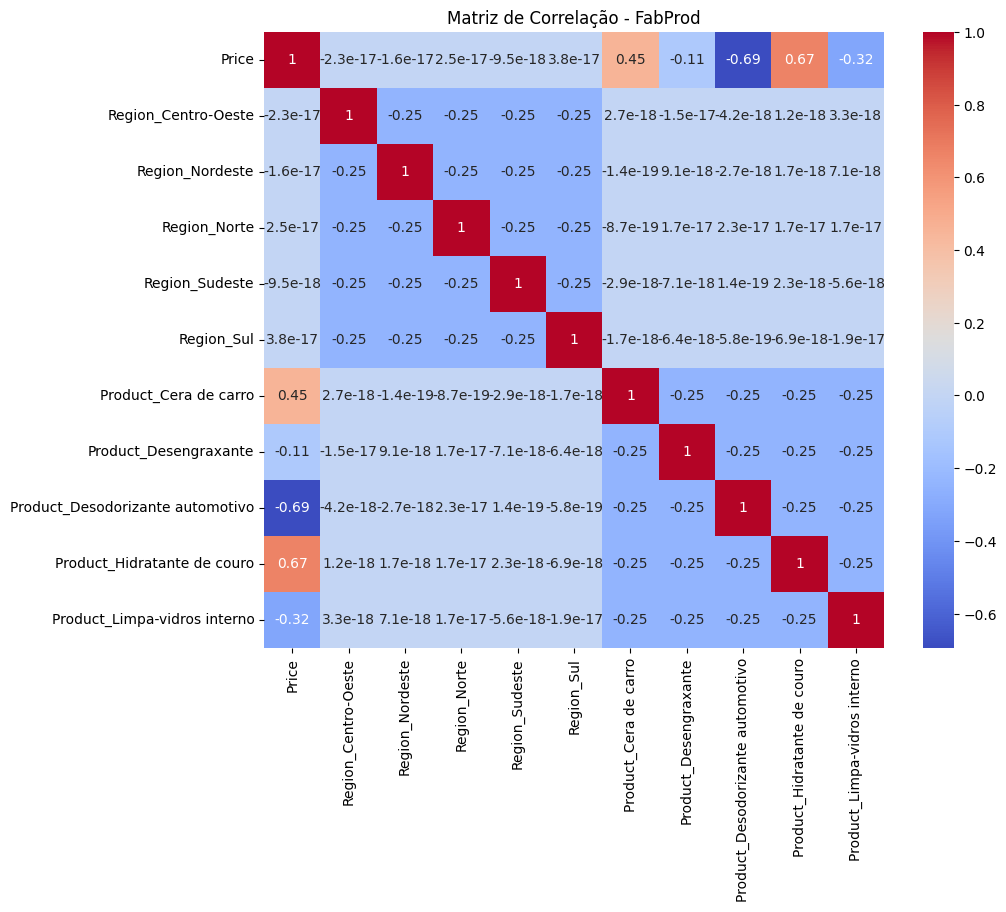

In [30]:
# Transformar as variáveis categóricas em variáveis numéricas usando o "one-hot encoding"
sales_data_encoded = pd.get_dummies(sales_data, columns=['Region', 'Product'])

# Calcular a matriz de correlação
corr_matrix = sales_data_encoded.corr()

# Plotar um mapa de calor para visualizar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação - FabProd')
plt.show()

Para realizar a análise de correlação, criou-se a matriz de correlação, uma tabela que apresenta os coeficientes de correlação de Pearson. Os valores próximos de 1 ou -1 indicam uma correlação mais forte, enquanto os valores próximos de 0 indicam uma correlação mais fraca ou nula.

A matriz de correlação é uma ferramenta importante na análise de dados da FabProd, permitindo explorar as relações entre as variáveis e identificar possíveis tendências e padrões que possam impactar o desempenho da empresa. Essa análise proporciona insights valiosos para embasar a tomada de decisões estratégicas, tais como ajustes de precificação, identificação de oportunidades de vendas e otimização de recursos.

**Modelo Preditivo**

In [31]:
# Codificar a variável "Region" usando one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
region_encoded = encoder.fit_transform(sales_data[['Region']])
region_encoded_df = pd.DataFrame(region_encoded, columns=encoder.get_feature_names_out(['Region']))

# Resetar os índices dos dataframes
sales_data = sales_data.reset_index(drop=True)
region_encoded_df = region_encoded_df.reset_index(drop=True)

# Combinar os dados originais com os dados codificados
sales_data_encoded = pd.concat([sales_data, region_encoded_df], axis=1)

# Codificar a variável "Product" usando one-hot encoding
product_encoded = encoder.fit_transform(sales_data[['Product']])
product_encoded_df = pd.DataFrame(product_encoded, columns=encoder.get_feature_names_out(['Product']))

# Resetar os índices dos dataframes
sales_data_encoded = sales_data_encoded.reset_index(drop=True)
product_encoded_df = product_encoded_df.reset_index(drop=True)

# Combinar os dados originais com os dados codificados
sales_data_encoded = pd.concat([sales_data_encoded, product_encoded_df], axis=1)

# Preparar os dados de entrada (X) e saída (y)
X = sales_data_encoded.drop(['Region', 'Product', 'MonthlySales'], axis=1)
y = sales_data_encoded['MonthlySales']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão linear múltipla
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular e imprimir as métricas de desempenho
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

MSE: 1595.9842762760059
R2 Score: 0.05094084334660609


Com base nos resultados do modelo preditivo avaliado para as vendas da FabProd, conclui-se que o desempenho do modelo é considerado ruim. Isso é evidenciado pelo alto valor do Erro Médio Quadrático (MSE), que indica previsões distantes dos valores reais das vendas, demonstrando falta de precisão.

Adicionalmente, o coeficiente de determinação (R2 Score) revela que apenas 5.09% da variabilidade dos dados é explicada pelo modelo. Isso indica uma capacidade limitada de prever com precisão as vendas dos produtos da FabProd com base nas variáveis utilizadas.

Com base nos resultados do modelo preditivo atual, percebe-se a necessidade de realizar ajustes e melhorias para que as previsões das vendas dos produtos da FabProd sejam mais precisas.

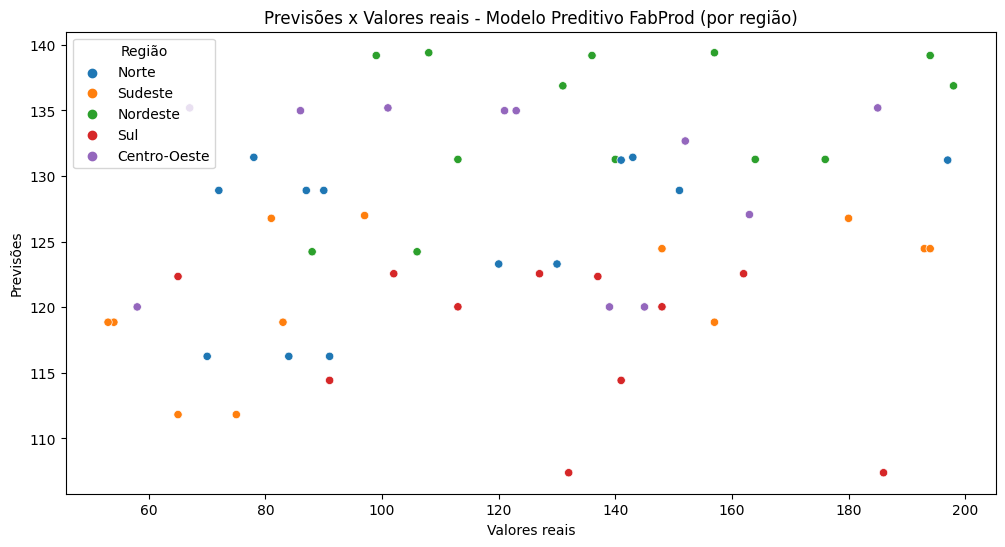

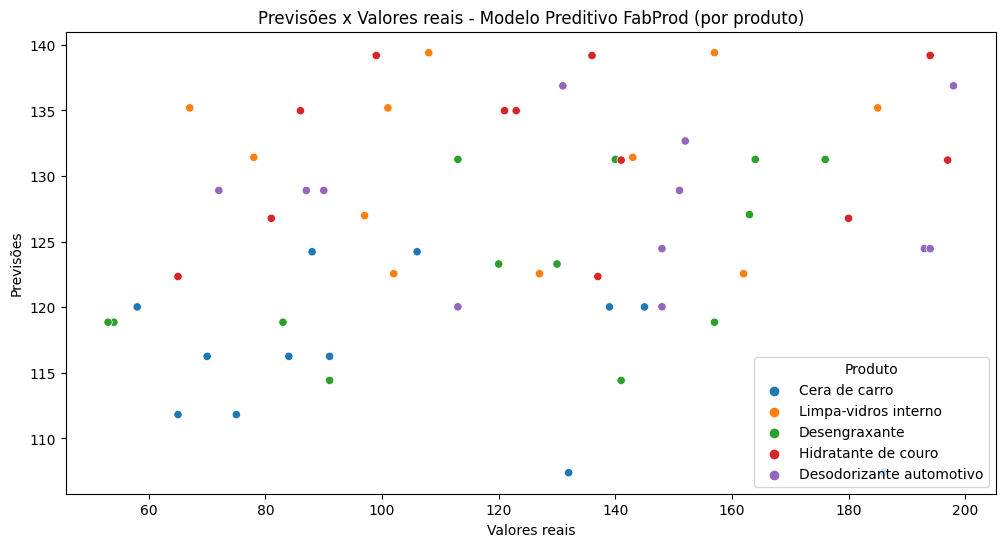

In [32]:
# Gráfico de dispersão das previsões x valores reais por região
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred, hue=sales_data_encoded.loc[y_test.index, 'Region'])
plt.xlabel('Valores reais')
plt.ylabel('Previsões')
plt.title('Previsões x Valores reais - Modelo Preditivo FabProd (por região)')
plt.legend(title='Região')
plt.show()

# Gráfico de dispersão das previsões x valores reais por produto
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred, hue=sales_data_encoded.loc[y_test.index, 'Product'])
plt.xlabel('Valores reais')
plt.ylabel('Previsões')
plt.title('Previsões x Valores reais - Modelo Preditivo FabProd (por produto)')
plt.legend(title='Produto')
plt.show()

Os gráficos de dispersão produzidos ilustram a performance do modelo ao comparar as previsões geradas com os valores reais das vendas mensais. A apresentação dos resultados foi realizada de duas formas distintas: uma considerando a categoria de produto e outra levando em consideração a região geográfica. Essa abordagem permite uma análise mais abrangente e permite identificar padrões e tendências específicas relacionadas à categoria de produto e à região geográfica.

**Conclusão**

A análise exploratória de dados realizada para a FabProd revelou insights valiosos sobre as vendas de seus produtos de limpeza de veículos. Ao valorizar os dados gerados internamente e externamente da cadeia produtiva, a empresa pôde identificar padrões sazonais, relações de correlação e tendências de vendas.

A matriz de correlação destacou a relação entre o preço dos produtos e as vendas mensais, fornecendo informações importantes para a realização de ajustes de precificação. A análise de tendências revelou flutuações sazonais nas vendas, permitindo à FabProd compreender a demanda em diferentes períodos.

Esses insights auxiliam a FabProd na tomada de decisões estratégicas, como a expansão dos negócios para outras regiões do Brasil. No entanto, é importante que a empresa se baseie não apenas nos dados analisados, mas também considere fatores externos, como a concorrência e as tendências de mercado, para garantir uma expansão bem-sucedida.

Portanto, a FabProd está mais preparada para expandir seus negócios, utilizando as informações obtidas por meio da análise de dados e valorizando tanto os dados internos quanto os externos da cadeia produtiva. Recomenda-se que a empresa utilize esses insights em conjunto com outras análises e informações relevantes para embasar suas decisões estratégicas e alcançar o sucesso na expansão.